<a href="https://colab.research.google.com/github/FernandoGarciaMan/Radioactive-Decay/blob/main/DecaimientoRadiactivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

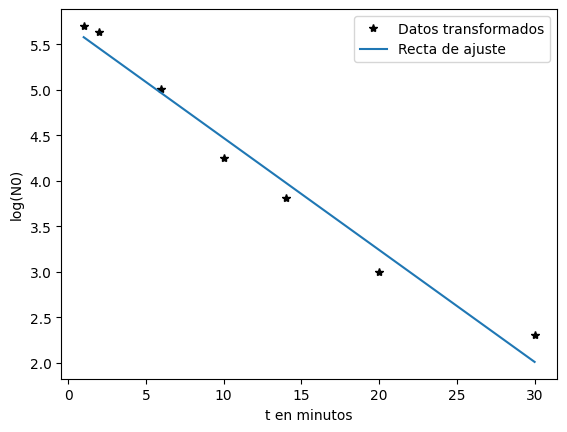

Lambda: 0.12312241841307704
N0: 299.8014604105314


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([1, 2, 6, 10, 14, 20, 30])
N = np.array([3, 2.8, 1.5, 0.7, 0.45, 0.2, 0.1]) * 10**2
x = t
y = np.log(N)
A = np.column_stack((x, np.ones_like(x)))
c = np.linalg.lstsq(A, y, rcond=None)[0]
lambda_val = -c[0]
N0 = np.exp(c[1])

# Dibujamos el resultado
plt.plot(x[:len(N)], y, 'k*', label='Datos transformados')
plt.plot(x[:len(N)], A.dot(c), label='Recta de ajuste')
plt.xlabel('t en minutos')
plt.ylabel('log(N0)')
plt.legend()
plt.show()

print(f'Lambda: {lambda_val}')
print(f'N0: {N0}')


In [ ]:
y_pred = A.dot(c)
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)

print(f'R^2: {r_squared}')


R^2: 0.9729845638201026


In [ ]:
def falsa_posicion(f,xl,xu,tol):
    x_m = xl
    error = 2*tol
    n_iteraciones = 0
    while (error>tol):
        n_iteraciones += 1
        x_m_old = x_m
        x_m = xu - (f(xu)*(xl-xu))/(f(xl)-f(xu))
        if x_m != 0:
            error = error_relativo(x_m,x_m_old)
        test = f(xl)*f(x_m)
        if test<0:
            xu = x_m
        elif test>0:
            xl = x_m
        else:
            error = 0
    return {'raiz': x_m,
            'error': error,
            'iteraciones': n_iteraciones
            }

In [ ]:
def f(t):
    return -lambda_val*t+ c[1]

In [ ]:
from math import fabs
def graficar(f,a,b,num=100):

    eje_x = np.linspace(start=a,
                    stop=b,
                    num=num)
    eje_y = [f(x) for x in eje_x]  # Listas de compresión
    plt.figure(figsize=(7,5))
    plt.plot(eje_x,eje_y,color='red')
    plt.axhline(0,color='gray') # Dibujar eje X
    plt.show()
def error_relativo(x_real,x_aprox):
    return fabs(x_real-x_aprox)/fabs(x_real)


In [ ]:
graficar(f,0,50)
falsa_posicion(f,40,50,0.00001)
